Missing values in the dataset:
Region                                     28
Date                                       28
Frequency                                  28
Estimated_Unemployment_Rate_(%)            28
Estimated_Employed                         28
Estimated_Labour_Participation_Rate_(%)    28
Area                                       28
dtype: int64


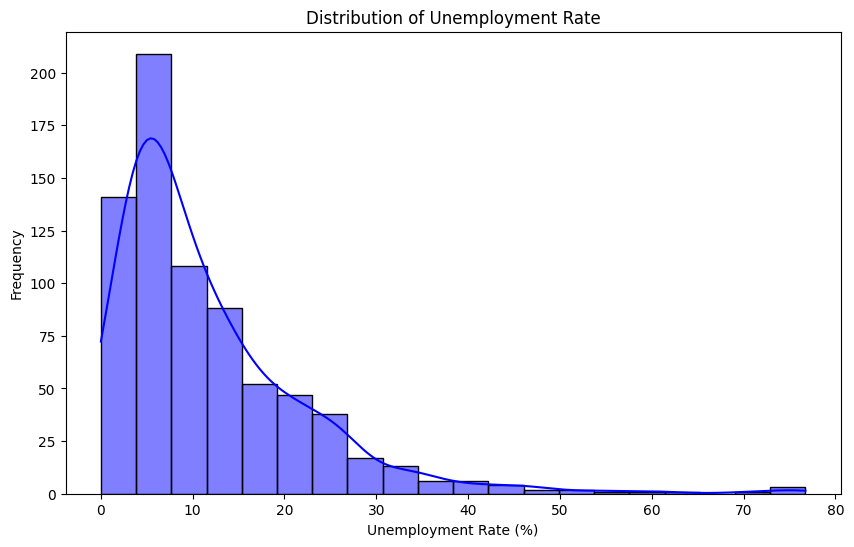

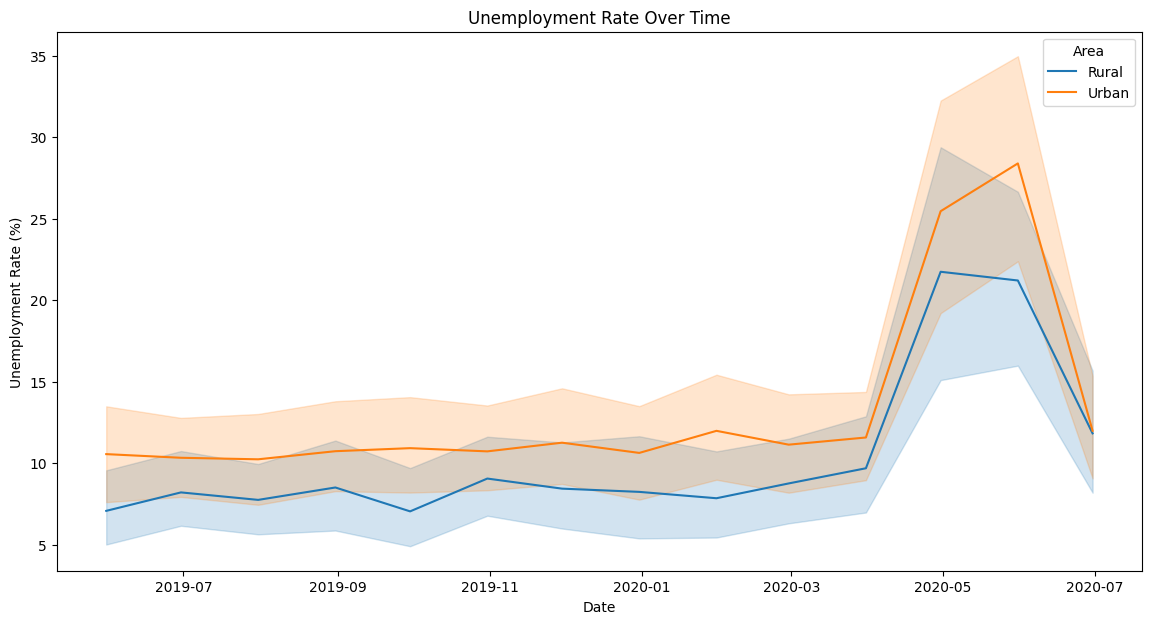

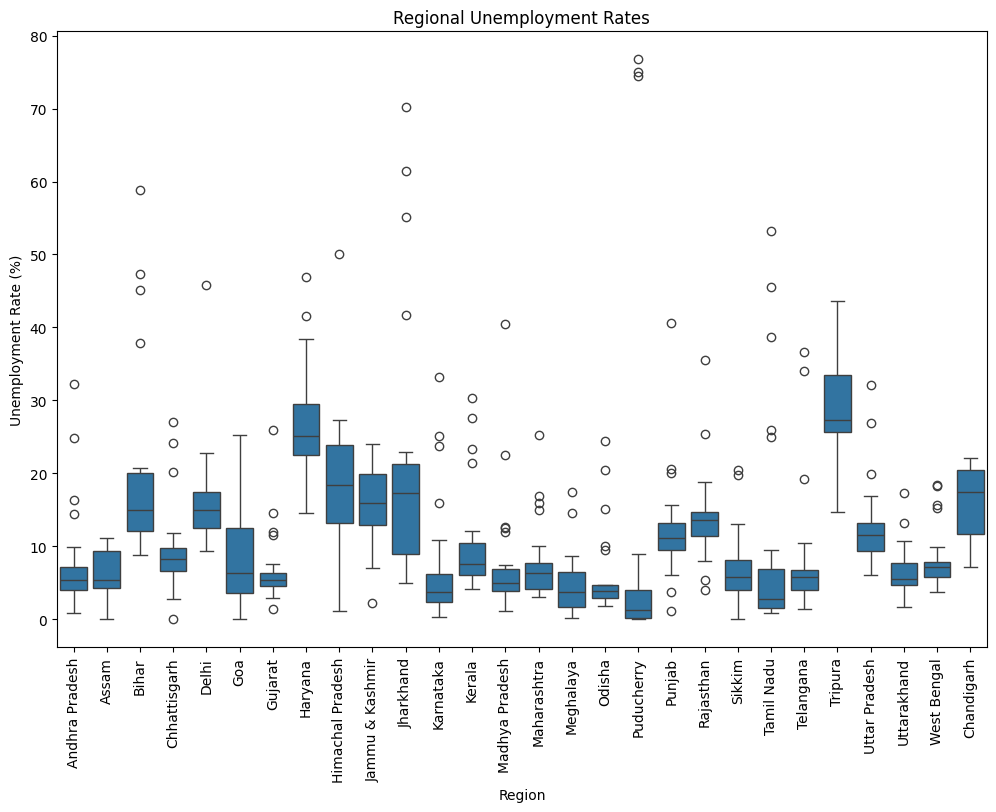

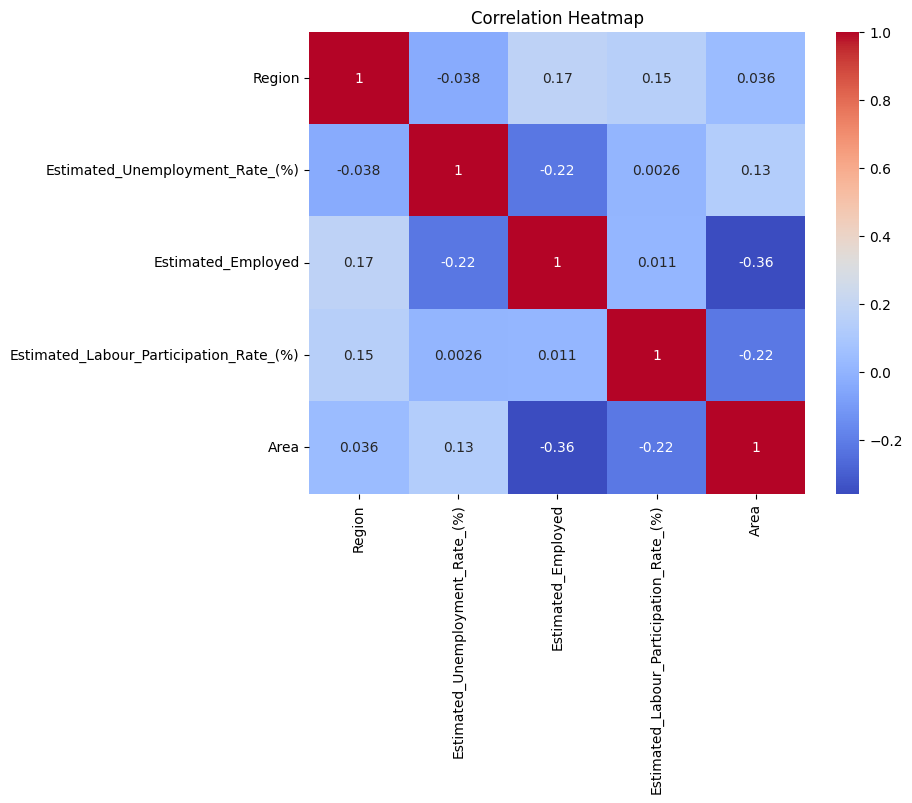


Average Unemployment Rate by Area:
Area
0    10.324791
1    13.166614
Name: Estimated_Unemployment_Rate_(%), dtype: float64
Cleaned dataset saved to cleaned_unemployment_data.csv

Key Insights:
1. The overall average unemployment rate is 11.79%.
2. Rural areas have an average unemployment rate of 10.32%, whereas urban areas have 13.17%.
3. The region with the highest unemployment rate is 23.
4. The region with the lowest unemployment rate is 15.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
data = pd.read_csv("data/Unemployment in India.csv")

# Step 2: Data Cleaning
# Rename columns for easier access
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Convert 'Date' column to datetime format
data['Date'] = data['Date'].str.strip()
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

# Step 3: Exploratory Data Analysis (EDA)
# Unemployment rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated_Unemployment_Rate_(%)'], kde=True, bins=20, color='blue')
plt.title("Distribution of Unemployment Rate")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

# Unemployment rate over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Date', y='Estimated_Unemployment_Rate_(%)', hue='Area')
plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Area")
plt.show()

# Regional unemployment rates
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Region', y='Estimated_Unemployment_Rate_(%)')
plt.xticks(rotation=90)
plt.title("Regional Unemployment Rates")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
# Convert categorical columns to numerical using pd.factorize
for column in ['Region', 'Area']:
    data[column], _ = pd.factorize(data[column])

# Now select numerical columns and plot heatmap
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 4: Analysis by Area
area_analysis = data.groupby('Area')['Estimated_Unemployment_Rate_(%)'].mean()
print("\nAverage Unemployment Rate by Area:")
print(area_analysis)

# Step 5: Save the Cleaned Data
cleaned_file = "cleaned_unemployment_data.csv"
data.to_csv(cleaned_file, index=False)
print(f"Cleaned dataset saved to {cleaned_file}")

# Step 6: Generate Insights
# High-level insights from the data
print("\nKey Insights:")
print(f"1. The overall average unemployment rate is {data['Estimated_Unemployment_Rate_(%)'].mean():.2f}%.")
# Access the area_analysis Series using the original labels 'Rural' and 'Urban'
print(f"2. Rural areas have an average unemployment rate of {area_analysis.loc[0] :.2f}%, whereas urban areas have {area_analysis.loc[1] :.2f}%.")  # Changed line
print(f"3. The region with the highest unemployment rate is {data.groupby('Region')['Estimated_Unemployment_Rate_(%)'].mean().idxmax()}.")
print(f"4. The region with the lowest unemployment rate is {data.groupby('Region')['Estimated_Unemployment_Rate_(%)'].mean().idxmin()}.")